In [1]:
import radar_attenuation.temp_profile_util as tpu
import radar_attenuation.gaia_util as gu

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1D Attenuation Calculations

In [2]:
filepath = "../data/1D/temp_profile/thermochemical_40km_Drho46_1D_profile2.txt"
# 1D thermochemical sym by ina made from ?
# Ice shell deth 40km
# ice density  46 kg/m3 ?? seems way too small. Unsure if this is correct
profile = np.loadtxt(filepath)

## Low Loss Europa Temperature Profile

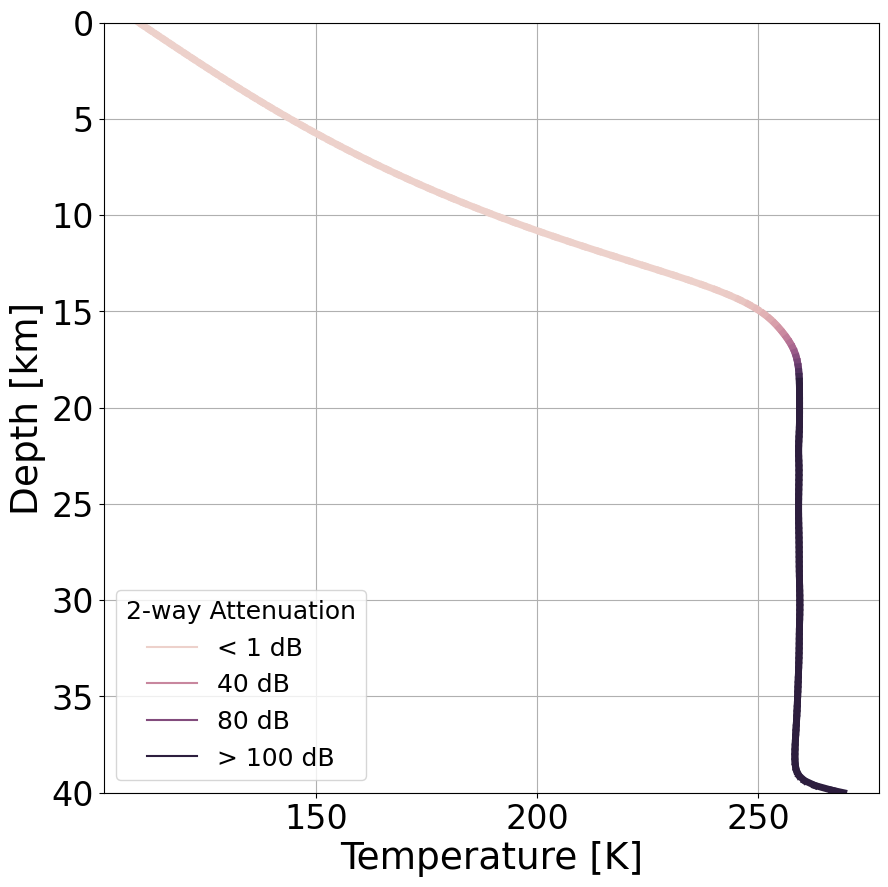

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tpu.mk_single_attenuation_profile(filepath, 0, 1, "low_loss", ax)
plt.show()

# High Loss

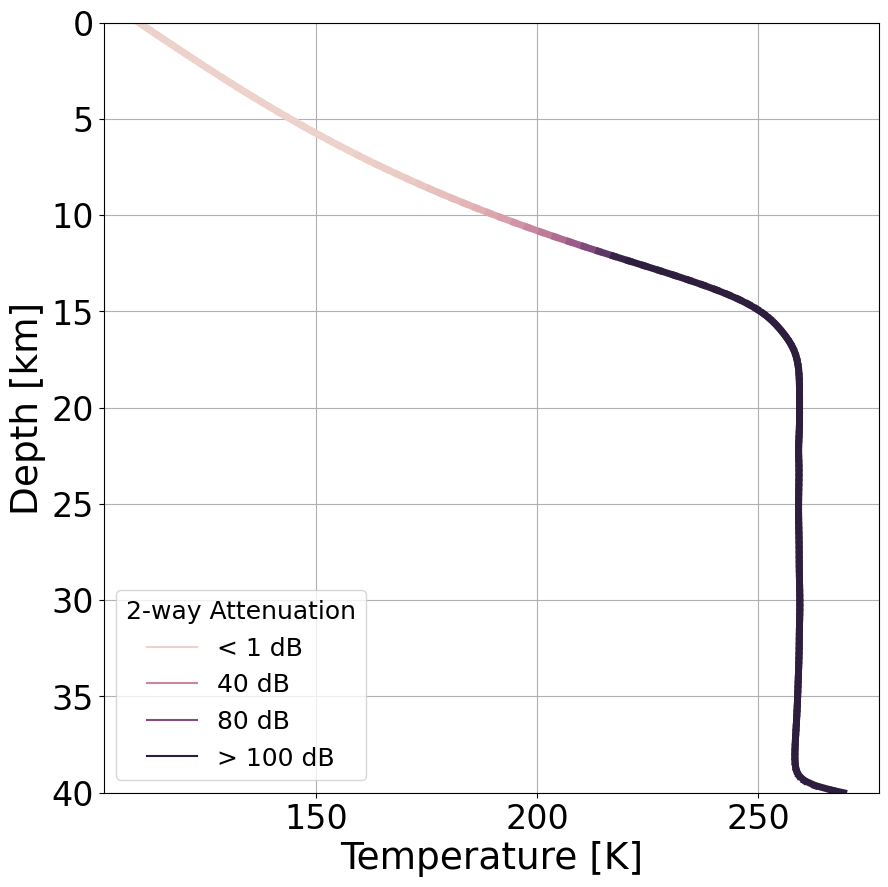

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
tpu.mk_single_attenuation_profile(filepath, 0, 1, "high_loss", ax)
plt.show()

# 2D GAIA profiles

In [5]:
T0 = 110 # K
Tb = 272.976
# scaleD = 21. # km
# scaleC =  0 # kg/m3
scaleT = (Tb-T0)
R0 = 252100.0

In [6]:
caseID = 'BasalG1_Ann'
path_to_caseID = "../data/gaia/temp_profile/europa/"

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e4 = return_list[0]
o_1e4 = return_list[1]

nShells = o_1e4.grid.nShells
nCellsPerShell = o_1e4.grid.nCellsPerShell[0]
gaia_temp_table = np.loadtxt(path_to_caseID+"thermochemical_40km_Drho46_2D_data.txt")
#gaia_temp_table_1e4 = gu.transform_T_to_table(s_1e4, o_1e4, caseID, T0, scaleT, scaleD, scaleC)
df_1e4, attenuation_1e4 = gu.calc_gaia_attenuation(gaia_temp_table, gaia_temp_table[:, 0].max()*1000, nShells, nCellsPerShell, "low_loss", 'europa')

Case: BasalG1_Ann Loaded Grid: BasalG1_Ann.grid
Got 0 new files, 1 in total.
Loaded time 0.26848397042127975 and iteration 79027
cells per depth 776.0


In [7]:
# see why column 1 is negative
df_1e4

,layerNum,depth,thickness,temp,attenuation_model,twoway_loss,column,simulation_model
0,1,-0.005143,125.00057,110.000000,low_loss,1.148473e-14,column_0,europa
1,2,124.995427,250.00114,110.827532,low_loss,4.691010e-14,column_0,europa
2,3,374.996567,250.00114,112.483650,low_loss,1.296217e-13,column_0,europa
3,4,624.997707,250.00114,114.141877,low_loss,3.182387e-13,column_0,europa
4,5,874.998847,250.00114,115.803261,low_loss,7.389599e-13,column_0,europa
...,...,...,...,...,...,...,...,...
157,158,39125.173267,250.00114,267.216296,low_loss,5.508415e+02,column_775,europa
158,159,39375.174407,250.00114,267.665462,low_loss,5.668688e+02,column_775,europa
159,160,39625.175547,250.00114,268.171243,low_loss,5.836334e+02,column_775,europa
160,161,39875.176687,125.00057,268.766224,low_loss,5.924692e+02,column_775,europa


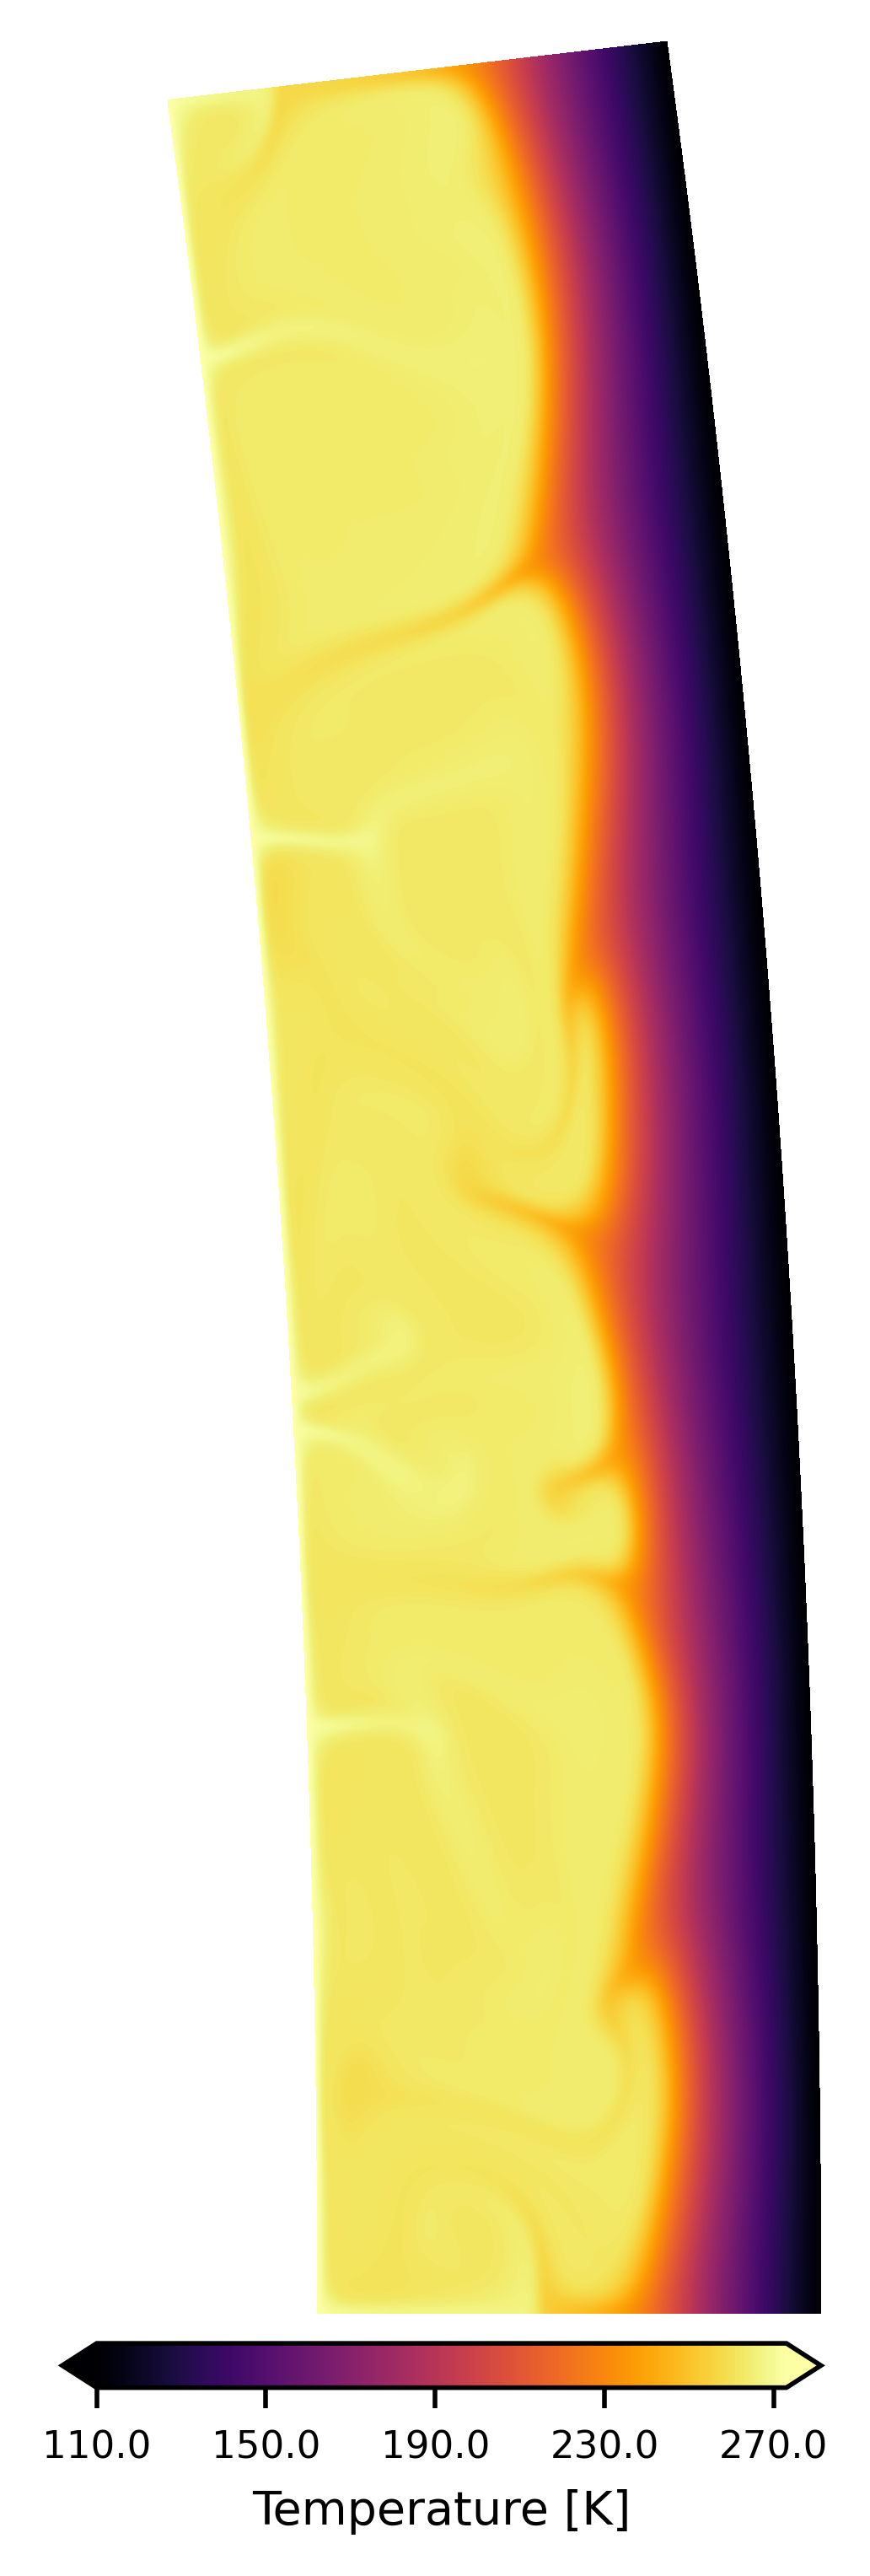

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
cb = gu.mk_gaia_T_plot(o_1e4, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

plt.show()

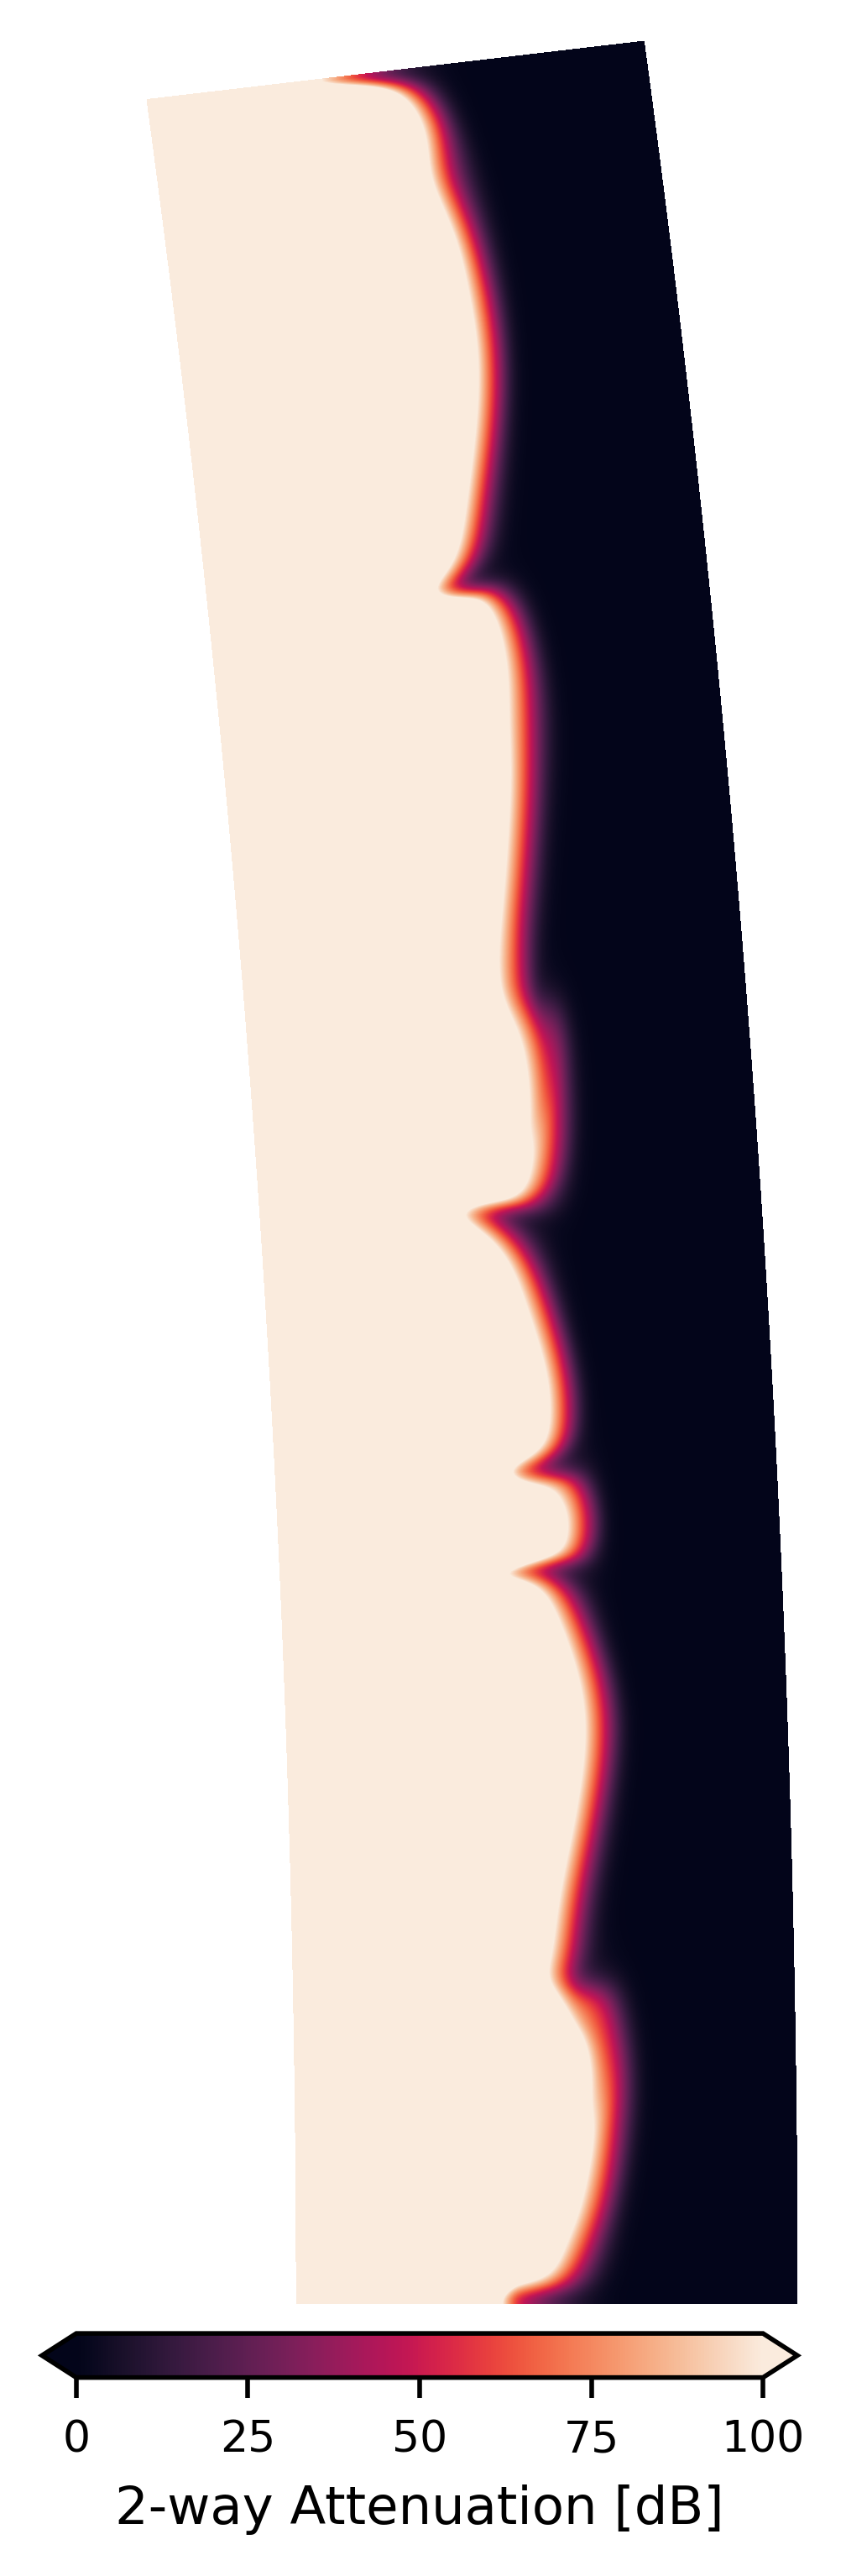

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
gu.mk_gaia_attenuation_plot(o_1e4, attenuation_1e4, '2-way Attenuation [dB]', 100, fig, ax, 9, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = 0, residual = False)
plt.show()

In [10]:
T0 = 110 # K
Tb = 272.976
scaleD = 21. # km
scaleC =  0 # kg/m3
scaleT = (Tb-T0)
R0 = 252100.0

Case: ann2_66_RR0.9167_P0.08 Loaded Grid: ann2_66_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 12.854793051942272 and iteration 29985
cells per depth 384.0


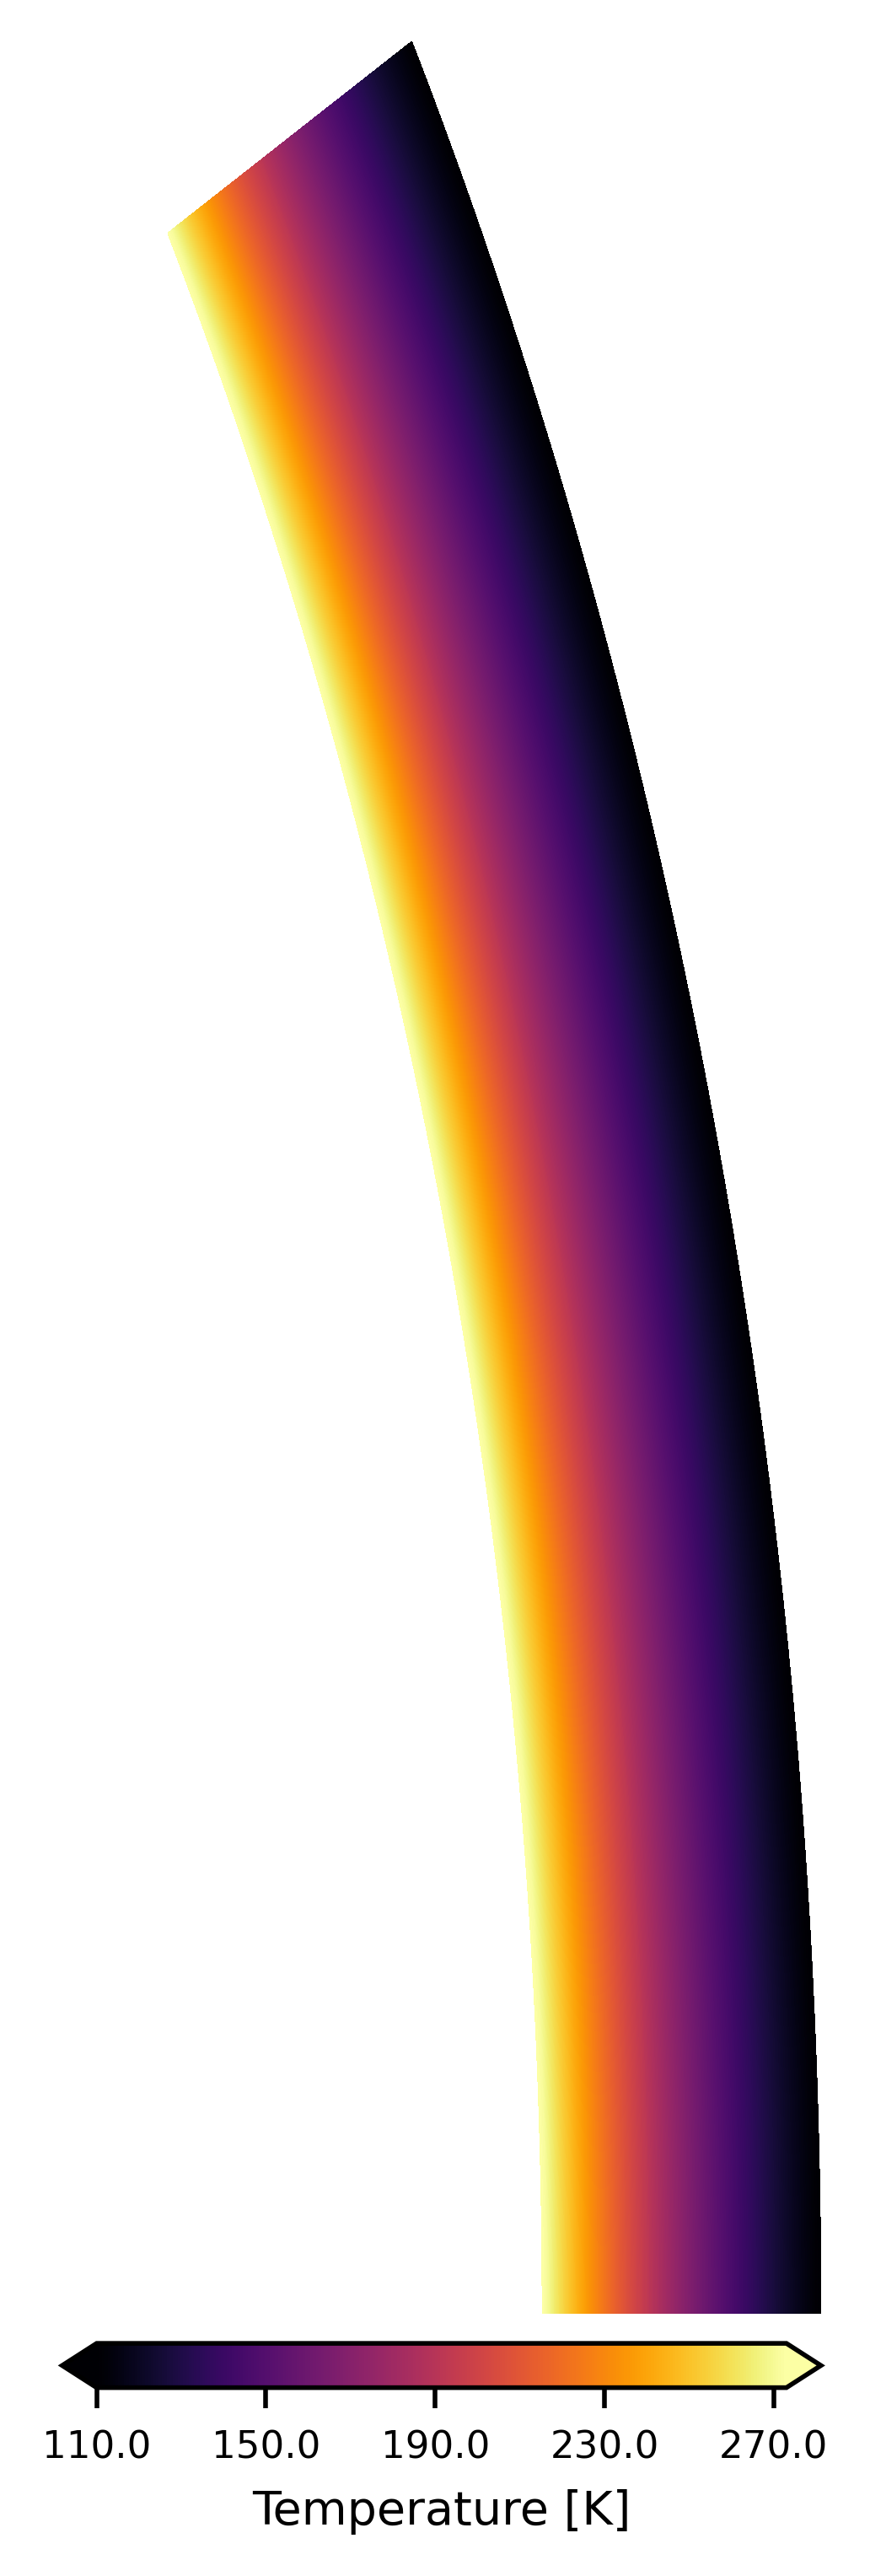

In [11]:
caseID = 'ann2_66_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-3/'

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e3 = return_list[0]
o_1e3 = return_list[1]
nShells = o_1e3.grid.nShells
nCellsPerShell = o_1e3.grid.nCellsPerShell[0]
gaia_temp_table_1e3 = gu.transform_T_to_table(s_1e3, o_1e3, caseID, T0, scaleT, scaleD, scaleC)
df_1e3, attenuation_1e3 = gu.calc_gaia_attenuation(gaia_temp_table_1e3, R0, nShells, nCellsPerShell, "low_loss", '1e-3')

fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
cb = gu.mk_gaia_T_plot(o_1e3, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

Case: ann2_129_RR0.9167_P0.08 Loaded Grid: ann2_129_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 1.3987502210449598 and iteration 87600
cells per depth 748.0


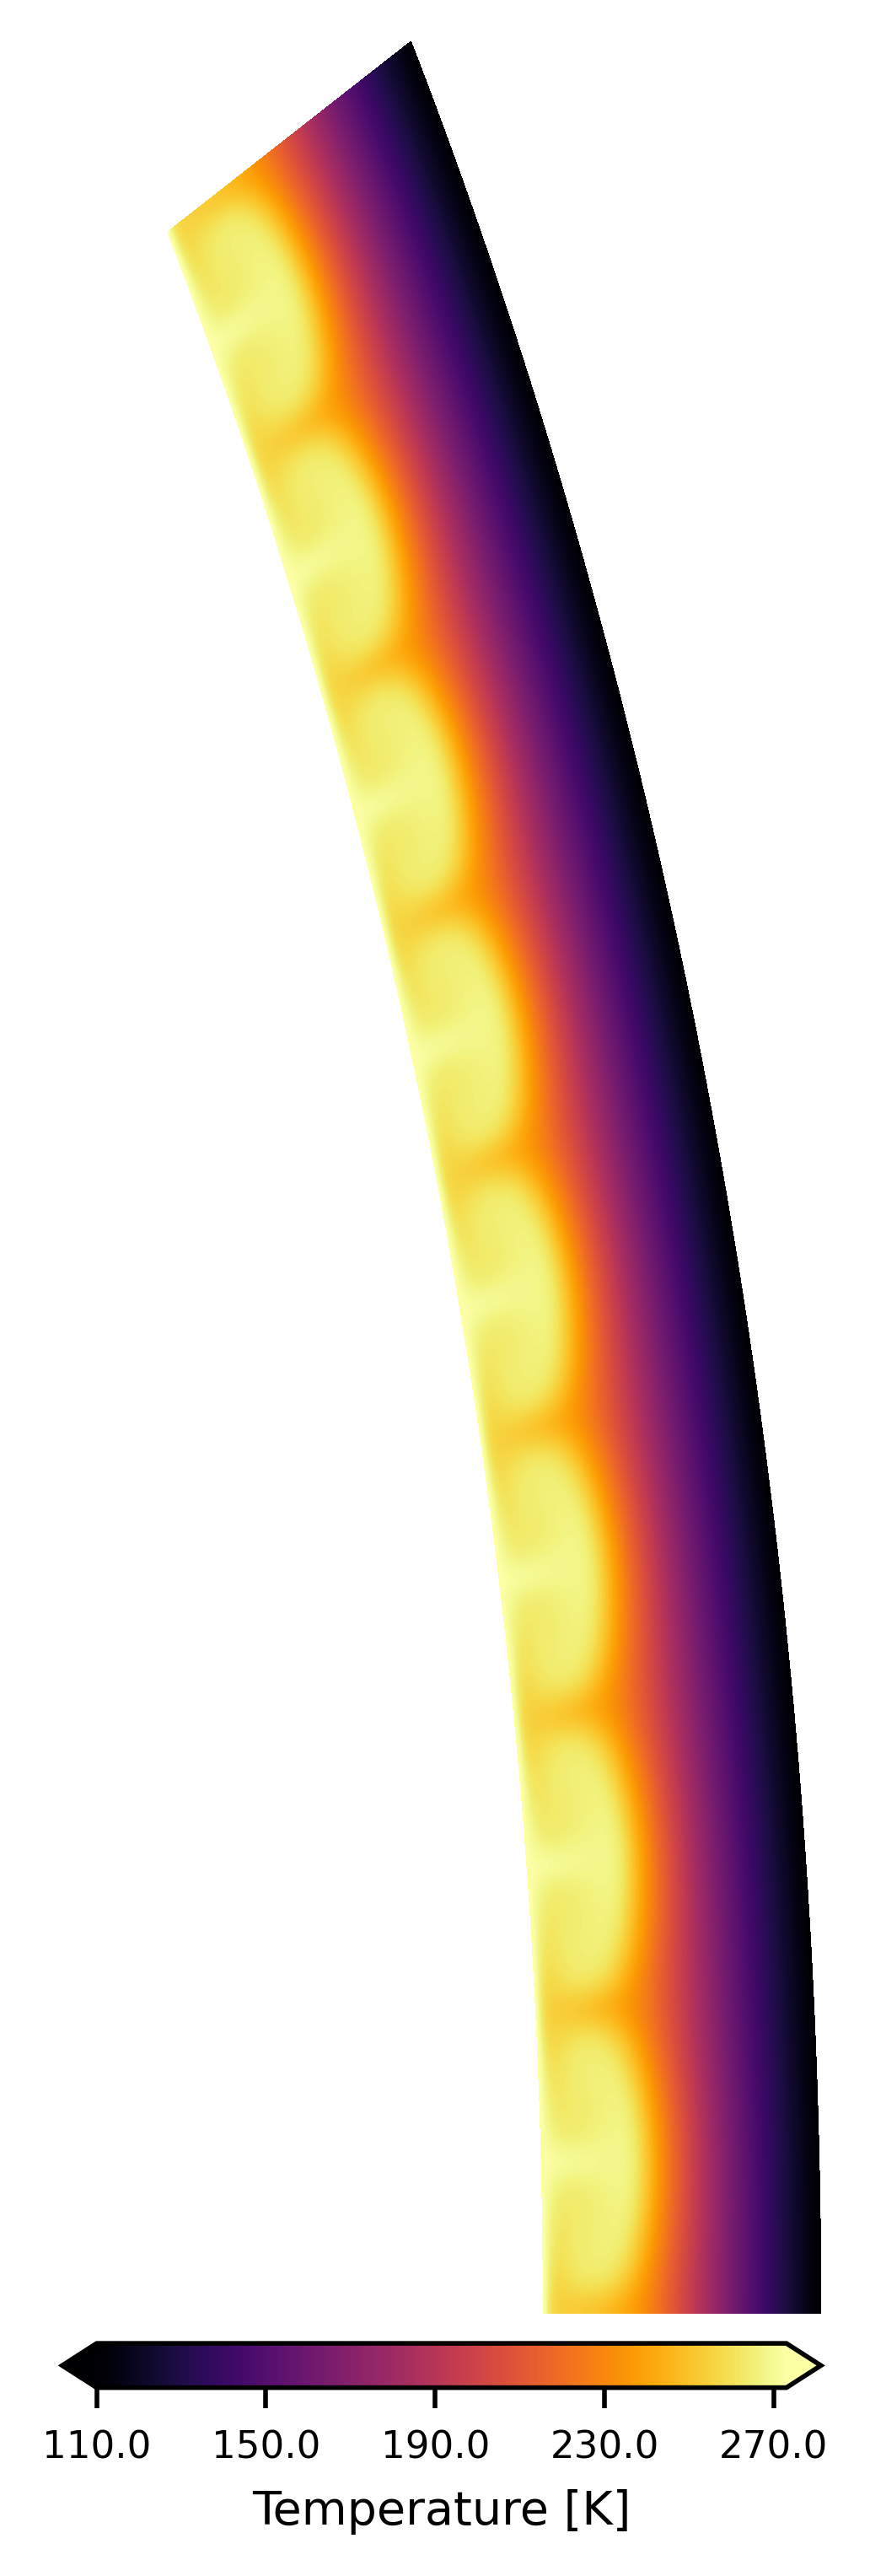

In [12]:
caseID = 'ann2_129_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-4/'


return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e4 = return_list[0]
o_1e4 = return_list[1]
nShells = o_1e4.grid.nShells
nCellsPerShell = o_1e4.grid.nCellsPerShell[0]
gaia_temp_table_1e4 = gu.transform_T_to_table(s_1e4, o_1e4, caseID, T0, scaleT, scaleD, scaleC)
df_1e4, attenuation_1e4 = gu.calc_gaia_attenuation(gaia_temp_table_1e4, R0, nShells, nCellsPerShell, "low_loss", '1e-4')

fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
cb = gu.mk_gaia_T_plot(o_1e4, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

Case: ann2_192_RR0.9167_P0.08 Loaded Grid: ann2_192_RR0.9167_P0.08.grid
Got 0 new files, 1 in total.
Loaded time 0.008581369423934265 and iteration 13339
cells per depth 1112.0


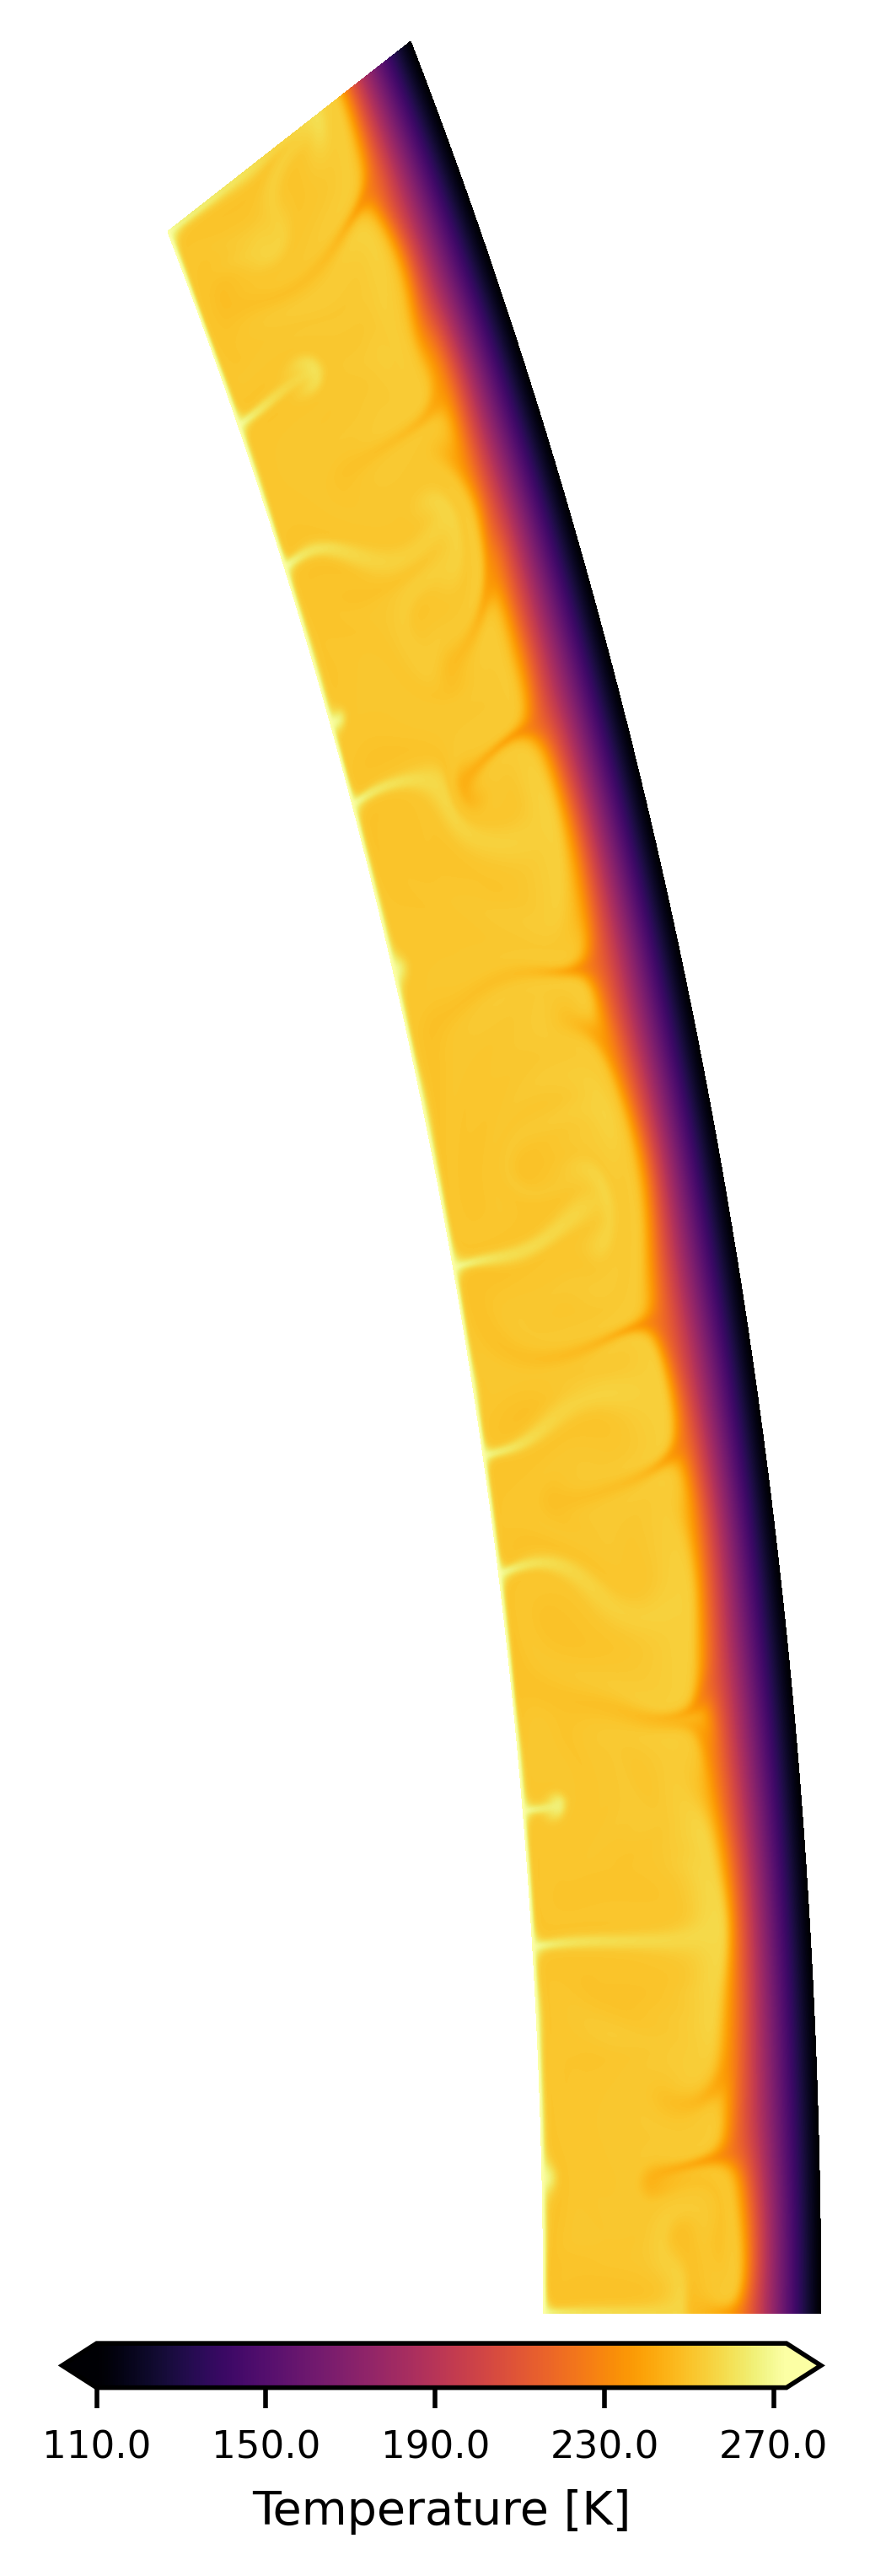

In [13]:
caseID = 'ann2_192_RR0.9167_P0.08'
path_to_caseID = '../data/gaia/temp_profile/gaia_grainsize_simulations/grain_1e-5/'

return_list = gu.load_sim(caseID, path_to_caseID, -1)
s_1e5 = return_list[0]
o_1e5 = return_list[1]
nShells = o_1e5.grid.nShells
nCellsPerShell = o_1e5.grid.nCellsPerShell[0]
gaia_temp_table_1e5 = gu.transform_T_to_table(s_1e5, o_1e5, caseID, T0, scaleT, scaleD, scaleC)
df_1e5, attenuation_1e5 = gu.calc_gaia_attenuation(gaia_temp_table_1e5, R0, nShells, nCellsPerShell, "low_loss", '1e-5')
fig, ax = plt.subplots(1, 1, figsize = (2, 7), dpi = 500)
cb = gu.mk_gaia_T_plot(o_1e5, scaleT, T0, Tb, fig, ax, 8, cbar_ax = [0, 0.085, 0.9, 0.015], lowerlim = T0)

In [14]:
# to fix this, add a boolean column that is "eutectic" or not

# depthwise_df = gu.calc_angular_ratio_data([df_1e3, df_1e4, df_1e5], 'Europa Simulations', a_r = 15)
# plot = gu.mk_angular_ratio_plot(depthwise_df, 'Depth to Eutectic (vary grain size)','Europa Simulations', plot_eutectic=True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# # plot.legend_.remove()
# plt.show()

# depthwise_df

{0.8580200672149658}


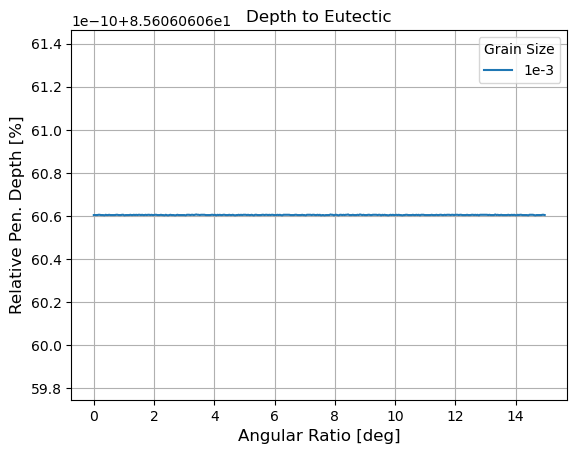

In [15]:
depthwise_df = gu.calc_angular_ratio_data([df_1e3], 'Grain Size', a_r = 15)
plot = gu.mk_angular_ratio_plot(depthwise_df, 'Depth to Eutectic', 'Grain Size', plot_eutectic=True)

{6.412924289703369}


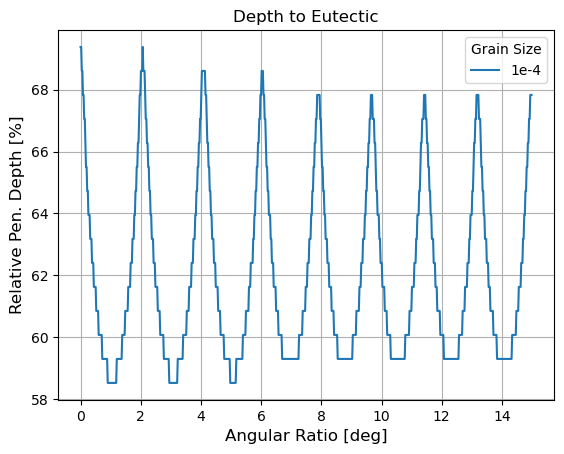

In [16]:
depthwise_df = gu.calc_angular_ratio_data([df_1e4], 'Grain Size', a_r = 15)
plot = gu.mk_angular_ratio_plot(depthwise_df, 'Depth to Eutectic', 'Grain Size', plot_eutectic=True)

{22.59532618522644}


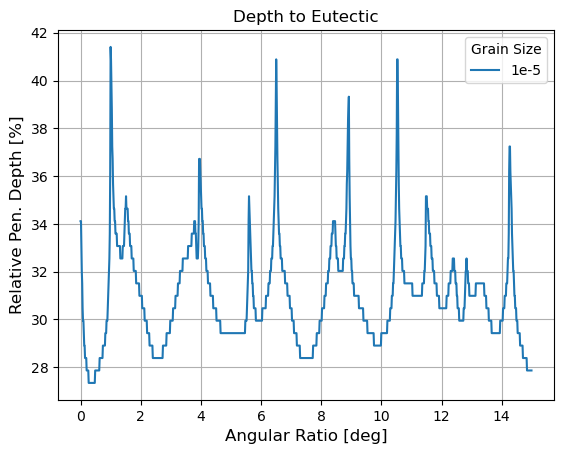

In [17]:
depthwise_df = gu.calc_angular_ratio_data([df_1e5], 'Grain Size', a_r = 15)
plot = gu.mk_angular_ratio_plot(depthwise_df, 'Depth to Eutectic', 'Grain Size', plot_eutectic=True)